In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = 'Arial'

In [3]:
df1 = pd.read_csv('results/subtype1/gwas_result/res_subtype1_pc10.txt.gz', sep=' ', low_memory=False)
df1 = df1[['SNP', 'BETA', 'P']]

In [4]:
df2 = pd.read_csv('results/subtype2/gwas_result/res_subtype2_pc10.txt.gz', sep=' ', low_memory=False)
df2 = df2[['SNP', 'BETA', 'P']]

In [5]:
# merge the two dataframes
df = pd.merge(df1, df2, on='SNP', suffixes=('_subtype1', '_subtype2'))

In [6]:
# pearson correlation between the two GWAS results
from scipy.stats import pearsonr
print('Pearsonr for BETA:', pearsonr(df['BETA_subtype1'], df['BETA_subtype2']))
print('Pearsonr for P-value:', pearsonr(df['P_subtype1'], df['P_subtype2']))

Pearsonr for BETA: PearsonRResult(statistic=0.3468191642545261, pvalue=0.0)
Pearsonr for P-value: PearsonRResult(statistic=0.0854344336382921, pvalue=0.0)


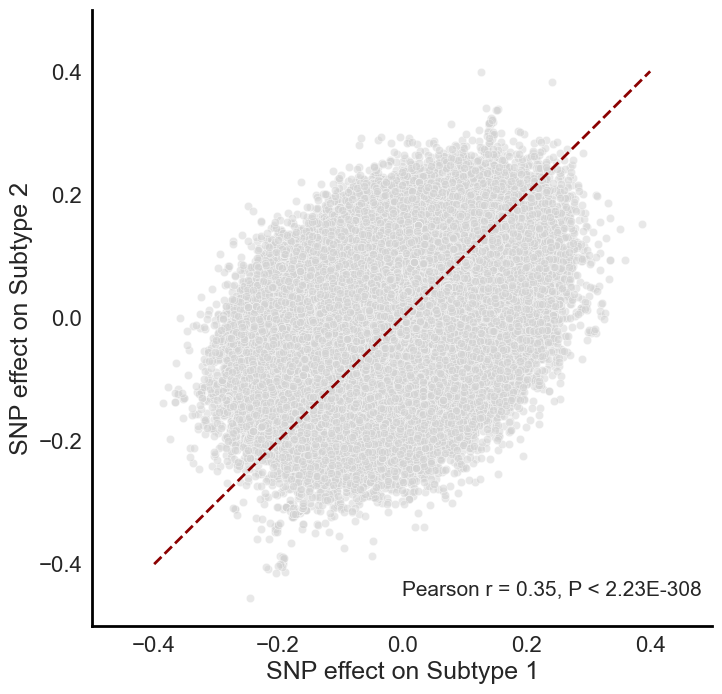

In [11]:
# plot scatter plot of beta values of the two GWAS results

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(x='BETA_subtype1', y='BETA_subtype2', data=df, ax=ax, color='lightgrey', alpha=0.5)
# add a red line for y=x
plt.plot([-0.4, 0.4], [-0.4, 0.4], color='darkred', linewidth=2, linestyle='--')
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.xlabel('SNP effect on Subtype 1')
plt.ylabel('SNP effect on Subtype 2')

plt.grid(False)

# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# spines width 2, color black
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('black')

# set tick font size, label size
ax.tick_params(axis='both', which='major', labelsize=16)
# x and y axis label size
ax.set_xlabel(ax.get_xlabel(), fontsize=18)
ax.set_ylabel(ax.get_ylabel(), fontsize=18)

# add pearson correlation to the plot on the bottom right
plt.text(0.00, -0.45, 'Pearson r = 0.35, P < 2.23E-308', fontsize=15)

plt.savefig('results/figs/subtype1_vs_subtype2_beta_scatterplot.jpg', dpi=300, bbox_inches='tight')

18
